

# Project 3 : SubReddit Classifier

---

## Problem Statement
---

A Book publisher has come up with an new and interesting idea for cook book and is looking forward to publish it.With so much of materials (like cooking and baking recipes) available online, they want to check if people are still interested in  reading a cook book i.e., will it be profitable to publish a cookbook.

This Project compares top 1000 posts from two **subreddit** - Bookclub and Cooking from **Reddit** which is an American social news aggregation, web content rating, and discussion website.
**Bookclub** is a discussion forum about all things related to books, authors, genres and recommendation of books. 
**Cooking** , as the name suggests is a discussion forum related to recipes, preparation and various cuisines  and all things related to cooking.

In this Project, these two subreddits are explored to see if people in Bookclub and Cooking are discussing about cookbook, despite so many cooking/baking recipes available online.






## Executive Summary



### Contents
- [Data Collection and Cleaning](#Data-Collection-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Pre Processing](#Pre-Processing)
- [Modeling](#Modelling)
- [Inferential Visualizations](#Inferential-Visualizations)
- [Conclusions and Recommendation](#Conclusions-and-Recommendation)


# Data Collection & Cleaning
---

Data is extracted from reddit website by webscrapping (-a technique to automatically access and extract large amounts of information from a website ) the subreddit **Cooking** and **Bookclub** and cleaned. The link to those jupter notebooks is as follows:
<br><br>
[Click here to open notebook Cooking](project3_cooking.ipynb)<br>
[Click here to open notebook Bookclub](project3_book.ipynb)<br><br>

## Exploratory Data Analysis
---

This step involves the following:

>1.Import and Read data<br>
>2.Data Dictionary<br>
>3.Data Visualization<br>
>4.Baseline Accuracy<br>

### Import and Read Data

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from matplotlib import rcParams
from wordcloud import WordCloud
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
#Code:
# reading the csv file into pandas dataframes
books=pd.read_csv('../data/final_books.csv')
cooking=pd.read_csv('../data/final_cooking.csv')

In [3]:
#displaying the first 5 rows of dataframe -books
books.head()

,subreddit,selftext
0,bookclub,Hello! \n\nWe have had an increase in posts th...
1,bookclub,Hi folks. We are starting a little later into ...
2,bookclub,Here's a discussion post for chapters 20-22 of...
3,bookclub,Did anyone make a character list for Moon of t...
4,bookclub,I AM SO SORRY THIS IS LATE YOU GUYS I THOUGHT ...


In [4]:
#displaying the dimensions of dataframe 
books.shape

(1074, 2)

In [5]:
#displaying the first 5 rows of dataframe -cooking
cooking.head()

,subreddit,selftext
0,Cooking,I have been learning how to cook over the past...
1,Cooking,Maybe this is about cooking. Maybe not. Since ...
2,Cooking,I typically save several dollars every trip to...
3,Cooking,"I eat a lot of steamed vegetables, particularl..."
4,Cooking,I currently own both a Crock Pot and an Instan...


In [6]:
#displaying the dimensions of dataframe 
cooking.shape

(1007, 2)

In [7]:
#joining books and cooking dataframe into a single dataframe named- reddit
reddit = pd.concat([books,cooking],ignore_index=True)
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 2 columns):
subreddit    2081 non-null object
selftext     2081 non-null object
dtypes: object(2)
memory usage: 32.6+ KB


In [8]:
#dimension of reddit dataframe
reddit.shape

(2081, 2)

In [9]:
#number of post from subreddit bookclub and cooking
reddit['subreddit'].value_counts()

bookclub    1074
Cooking     1007
Name: subreddit, dtype: int64

In [10]:
#displaying first 5 rows of reddit dataframe
reddit.head()

,subreddit,selftext
0,bookclub,Hello! \n\nWe have had an increase in posts th...
1,bookclub,Hi folks. We are starting a little later into ...
2,bookclub,Here's a discussion post for chapters 20-22 of...
3,bookclub,Did anyone make a character list for Moon of t...
4,bookclub,I AM SO SORRY THIS IS LATE YOU GUYS I THOUGHT ...


In [11]:
# changing subreddit column to a numerical column
# bookclub is 1 and cooking is 0
reddit['subreddit'] = [1 if reddit.loc[i,'subreddit'] == 'bookclub' else 0 for i in range(reddit.shape[0])]

In [12]:
# checking the value counts of subreddit 
reddit['subreddit'].value_counts()

1    1074
0    1007
Name: subreddit, dtype: int64

In [13]:
#creating a new column- length 
# this gives the length of the post
reddit['length'] = np.NaN
for i in range(0,len(reddit['selftext'])):
    reddit['length'][i]=(len(reddit['selftext'][i]))
reddit.length = reddit.length.astype(int)

In [14]:
#displaying first 5 rows of reddit dataframe
reddit.head()

,subreddit,selftext,length
0,1,Hello! \n\nWe have had an increase in posts th...,3449
1,1,Hi folks. We are starting a little later into ...,494
2,1,Here's a discussion post for chapters 20-22 of...,96
3,1,Did anyone make a character list for Moon of t...,64
4,1,I AM SO SORRY THIS IS LATE YOU GUYS I THOUGHT ...,186


In [15]:
#datatype of each variable in dataframe
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 3 columns):
subreddit    2081 non-null int64
selftext     2081 non-null object
length       2081 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.9+ KB


### Data Dictionary

|Feature|Type|Description|
|---|---|---|
|subreddit|int64|specifies the type of subreddit|
|selftext|object|post of the subreddit| 
|length|int64|length of the post|

### Data Visualization

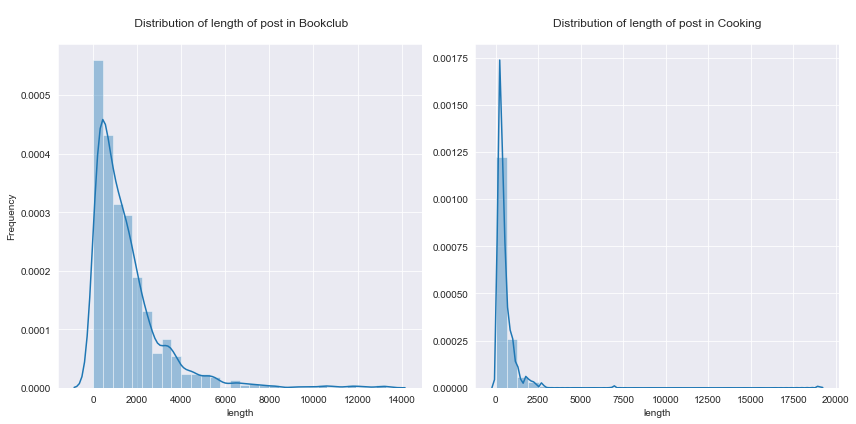

In [16]:
#creating subplots to see distribution of length of post in each subreddit
sns.set_style("darkgrid");
f, (ax1, ax2) = plt.subplots(figsize=(12,6),nrows=1, ncols=2,tight_layout=True);
sns.distplot(reddit[reddit['subreddit']==1]["length"],bins=30,ax=ax1);
sns.distplot(reddit[reddit['subreddit']==0]["length"],bins=30,ax=ax2);
ax1.set_title('\n Distribution of length of post in Bookclub\n');
ax2.set_title('\nDistribution of length of post in Cooking\n ');
ax1.set_ylabel('Frequency');

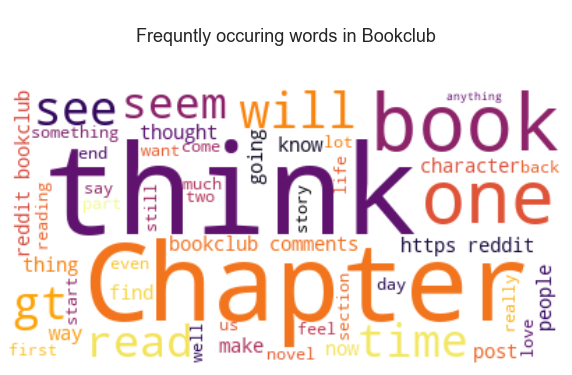

In [17]:
# word cloud for subreddit - bookclub
book=" ".join(post for post in reddit[reddit['subreddit']==1].selftext)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(book)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words in Bookclub\n\n',fontsize=18)
plt.axis("off")
plt.show()

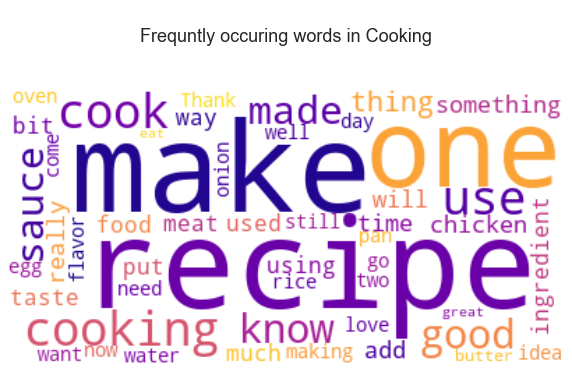

In [18]:
# word cloud for subreddit - cooking
cooking=" ".join(post for post in reddit[reddit['subreddit']==0].selftext)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white",colormap="plasma").generate(cooking)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words in Cooking\n\n',fontsize=18)
plt.axis("off")
plt.show()

### Baseline Accuracy

Baseline accuracy is calculated which acts as a reference to check if model is outperforming the null model (predicting the majority class)

In [19]:
#calculating basline accuracy
reddit['subreddit'].value_counts(normalize=True)

1    0.516098
0    0.483902
Name: subreddit, dtype: float64

## Pre Processing 
---

This step involves the following methods :

>1.Tokenizing<br>
>2.Removing Stopwords<br>
>3.Lemmatizing<br>

### Tokenizing

When we "tokenize" data, we take it and split it up into distinct chunks based on some pattern.

In [20]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

In [21]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+') 

In [22]:
#changing the contents of selftext to lowercase
reddit.loc[:,'selftext'] = reddit.selftext.apply(lambda x : str.lower(x))

In [23]:
# "Run" Tokenizer
reddit['tokens'] = reddit['selftext'].map(tokenizer.tokenize)

In [24]:
#displaying first 5 rows of dataframe
reddit.head()

,subreddit,selftext,length,tokens
0,1,hello! \n\nwe have had an increase in posts th...,3449,"[hello, we, have, had, an, increase, in, posts..."
1,1,hi folks. we are starting a little later into ...,494,"[hi, folks, we, are, starting, a, little, late..."
2,1,here's a discussion post for chapters 20-22 of...,96,"[here, s, a, discussion, post, for, chapters, ..."
3,1,did anyone make a character list for moon of t...,64,"[did, anyone, make, a, character, list, for, m..."
4,1,i am so sorry this is late you guys i thought ...,186,"[i, am, so, sorry, this, is, late, you, guys, ..."


### Removing Stop Words

Removing commonly used words/stop words as they take up space and processing time.

In [25]:
# Printing English stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
#assigning stopwords to a variable
stop = stopwords.words("english")

In [27]:
#removing stopwords from tokens
reddit['tokens']=reddit['tokens'].apply(lambda x: [item for item in x if item not in stop])

### Lemmatizing 
When we "lemmatize" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word.<br>


In [28]:
# Importing lemmatizer and stemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Instantiating lemmatizer and stemmer 
lemmatizer = WordNetLemmatizer()
p_stemmer = PorterStemmer()


In [29]:
lemmatize_words=[]
for i in range (len(reddit['tokens'])):
    word=''
    for j in range(len(reddit['tokens'][i])):
        lemm_word=lemmatizer.lemmatize(reddit['tokens'][i][j])#lemmatize
        
        word=word + ' '+lemm_word # joining tokens into sentence    
    lemmatize_words.append(word) # store in list
   

In [30]:
#creating a new column to store the result
reddit['lemmatized']=lemmatize_words

In [31]:
#displaying first 5 rows of dataframe
reddit.head()

,subreddit,selftext,length,tokens,lemmatized
0,1,hello! \n\nwe have had an increase in posts th...,3449,"[hello, increase, posts, break, rules, r, book...",hello increase post break rule r bookclub nip...
1,1,hi folks. we are starting a little later into ...,494,"[hi, folks, starting, little, later, january, ...",hi folk starting little later january camping...
2,1,here's a discussion post for chapters 20-22 of...,96,"[discussion, post, chapters, 20, 22, moon, cru...",discussion post chapter 20 22 moon crusted sn...
3,1,did anyone make a character list for moon of t...,64,"[anyone, make, character, list, moon, uncruste...",anyone make character list moon uncrusted snow
4,1,i am so sorry this is late you guys i thought ...,186,"[sorry, late, guys, thought, would, cell, serv...",sorry late guy thought would cell service seq...


## Modelling 
---
 This step creates three models and compares them.

>1.Logistic Regression Model<br>
>2.Naive Bayes Model<br>
>3.Decision Tree Model<br>
>4.Comapring Models

In [32]:
#imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [33]:
#defining X and y for the model
X = reddit['lemmatized']
y = reddit['subreddit']

In [34]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [35]:
#ensuring that the value counts are quite evenly distributed
y_train.value_counts()

1    805
0    755
Name: subreddit, dtype: int64

In [36]:
y_test.shape

(521,)

### Logistic Regression Model

In [37]:
# pipeline will consist of two stages:
# 1.Instantiating countVectorizer
# 2.Instantiating logistic regression model

pipe = Pipeline([
    ('cvec', CountVectorizer()),  
    ('lr', LogisticRegression()) 
])

In [38]:
tuned_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=tuned_params, cv=3) # Evaluating model on unseen data

model_lr=gs.fit(X_train, y_train) # Fitting model

# This is the average of all cv folds for a single 
#combination of the parameters specified in the tuned_params
print(gs.best_score_) 

#displaying the best values of parameters
gs.best_params_

0.9846153846153847


{'cvec__max_df': 0.9,
 'cvec__max_features': 3500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [39]:
# Training score
gs.score(X_train, y_train)

0.9980769230769231

In [40]:
# Test score
gs.score(X_test, y_test)

0.9942418426103646

In [41]:
# Generating predictions!
predictions_lr = model_lr.predict(X_test)

In [42]:
# Importing the confusion matrix function
from sklearn.metrics import confusion_matrix

In [43]:
# Generating confusion matrix
confusion_matrix(y_test, predictions_lr)

array([[252,   0],
       [  3, 266]])

In [44]:
#interpreting confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions_lr).ravel()

In [45]:
#values with coreesponding labels
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 252
False Positives: 0
False Negatives: 3
True Positives: 266


### Naive Bayes Model



In [46]:
# Importing model
from sklearn.naive_bayes import MultinomialNB

In [47]:
# Instantiating model
nb = MultinomialNB()

In [48]:
# Instantiating CountVectorizer.
cvec = CountVectorizer(max_features = 500)

In [49]:
# fit_transform() fits the model and transforms training data into feature vectors
X_train_cvec = cvec.fit_transform(X_train, y_train).todense()

In [50]:
#tranform test data and convert into array
X_test_cvec = cvec.transform(X_test).todense()

In [51]:
# Fitting model
model_nb=nb.fit(X_train_cvec, y_train)

In [52]:
# Generating predictions
predictions_nb = model_nb.predict(X_test_cvec)

In [53]:
# Training score
model_nb.score(X_train_cvec, y_train)

0.9871794871794872

In [54]:
# Test score
model_nb.score(X_test_cvec, y_test)

0.9846449136276392

In [55]:
# Generating confusion matrix
confusion_matrix(y_test, predictions_nb)

array([[244,   8],
       [  0, 269]])

In [56]:
#interpreting confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions_nb).ravel()

In [57]:
#values with coreesponding labels
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 244
False Positives: 8
False Negatives: 0
True Positives: 269


### Decision Tree Model

In [58]:
# Import model.
from sklearn.tree import DecisionTreeClassifier

In [59]:
pipe = Pipeline([
    ('cvec', CountVectorizer()), #Instantiating countVectorizer
    ('dt', DecisionTreeClassifier()) # Instantiating logistic regression model
])

In [60]:
# Instantiating model
dt = DecisionTreeClassifier(random_state = 42)

In [61]:
# Fitting model
model_dt=dt.fit(X_train_cvec, y_train)


In [62]:
# Generating predictions
predictions_dt = model_dt.predict(X_test_cvec)

In [63]:
# Training score
model_dt.score(X_train_cvec, y_train)

0.9993589743589744

In [64]:
# Test score
model_dt.score(X_test_cvec, y_test)

0.9328214971209213

In [65]:
# Generating confusion matrix
confusion_matrix(y_test, predictions_dt)

array([[232,  20],
       [ 15, 254]])

In [66]:
#interpreting confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions_dt).ravel()

In [67]:
#values with coreesponding labels
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 232
False Positives: 20
False Negatives: 15
True Positives: 254


### Comparing Models

|Model|Train Score|Test Score|
|---|---|---|
|Logistic Regression Model|0.9980769230769231|0.9942418426103646|
|Naive Bayes Model|0.9871794871794872|0.9846449136276392
|Decision Tree Model|0.9993589743589744|0.9328214971209213|

As shown above Logistic Regression perfoms better than Naive bayes and decision Tree in training and test data.
Decision Tree is overfitting as it does not generalise well on unseen data i.e., test data.

|Model|False Positives|False Negatives|
|---|---|---|
|Logistic Regression Model|0|3|
|Naive Bayes Model|8|0|
|Decision Tree Model|20|15|


The above table shows the number of misclassfication in the models. Logistic Regression has the least number of misclassification followed by Naive Bayes and Decision Tree Model

# Inferential Visualizations
---

This step invloves the following:
    
>1. Creating a desicion tree with Labels <br> 
>2. Creating word clouds for subreddit - Bookclub and Cooking<br>

In [68]:
#imports for displaying decision tree with labels
from sklearn.externals.six import StringIO
import pydot
from sklearn import tree
from IPython.display import Image

dot_data = StringIO() #instatntiate stringIO

#This function generates a GraphViz representation of the decision tree, which is then written into out_file.
tree.export_graphviz(model_dt, out_file=dot_data, feature_names=cvec.get_feature_names())
graph = pydot.graph_from_dot_data(dot_data.getvalue()) #loads graph
graph[0].write_pdf("tree.pdf") #saved as pdf file

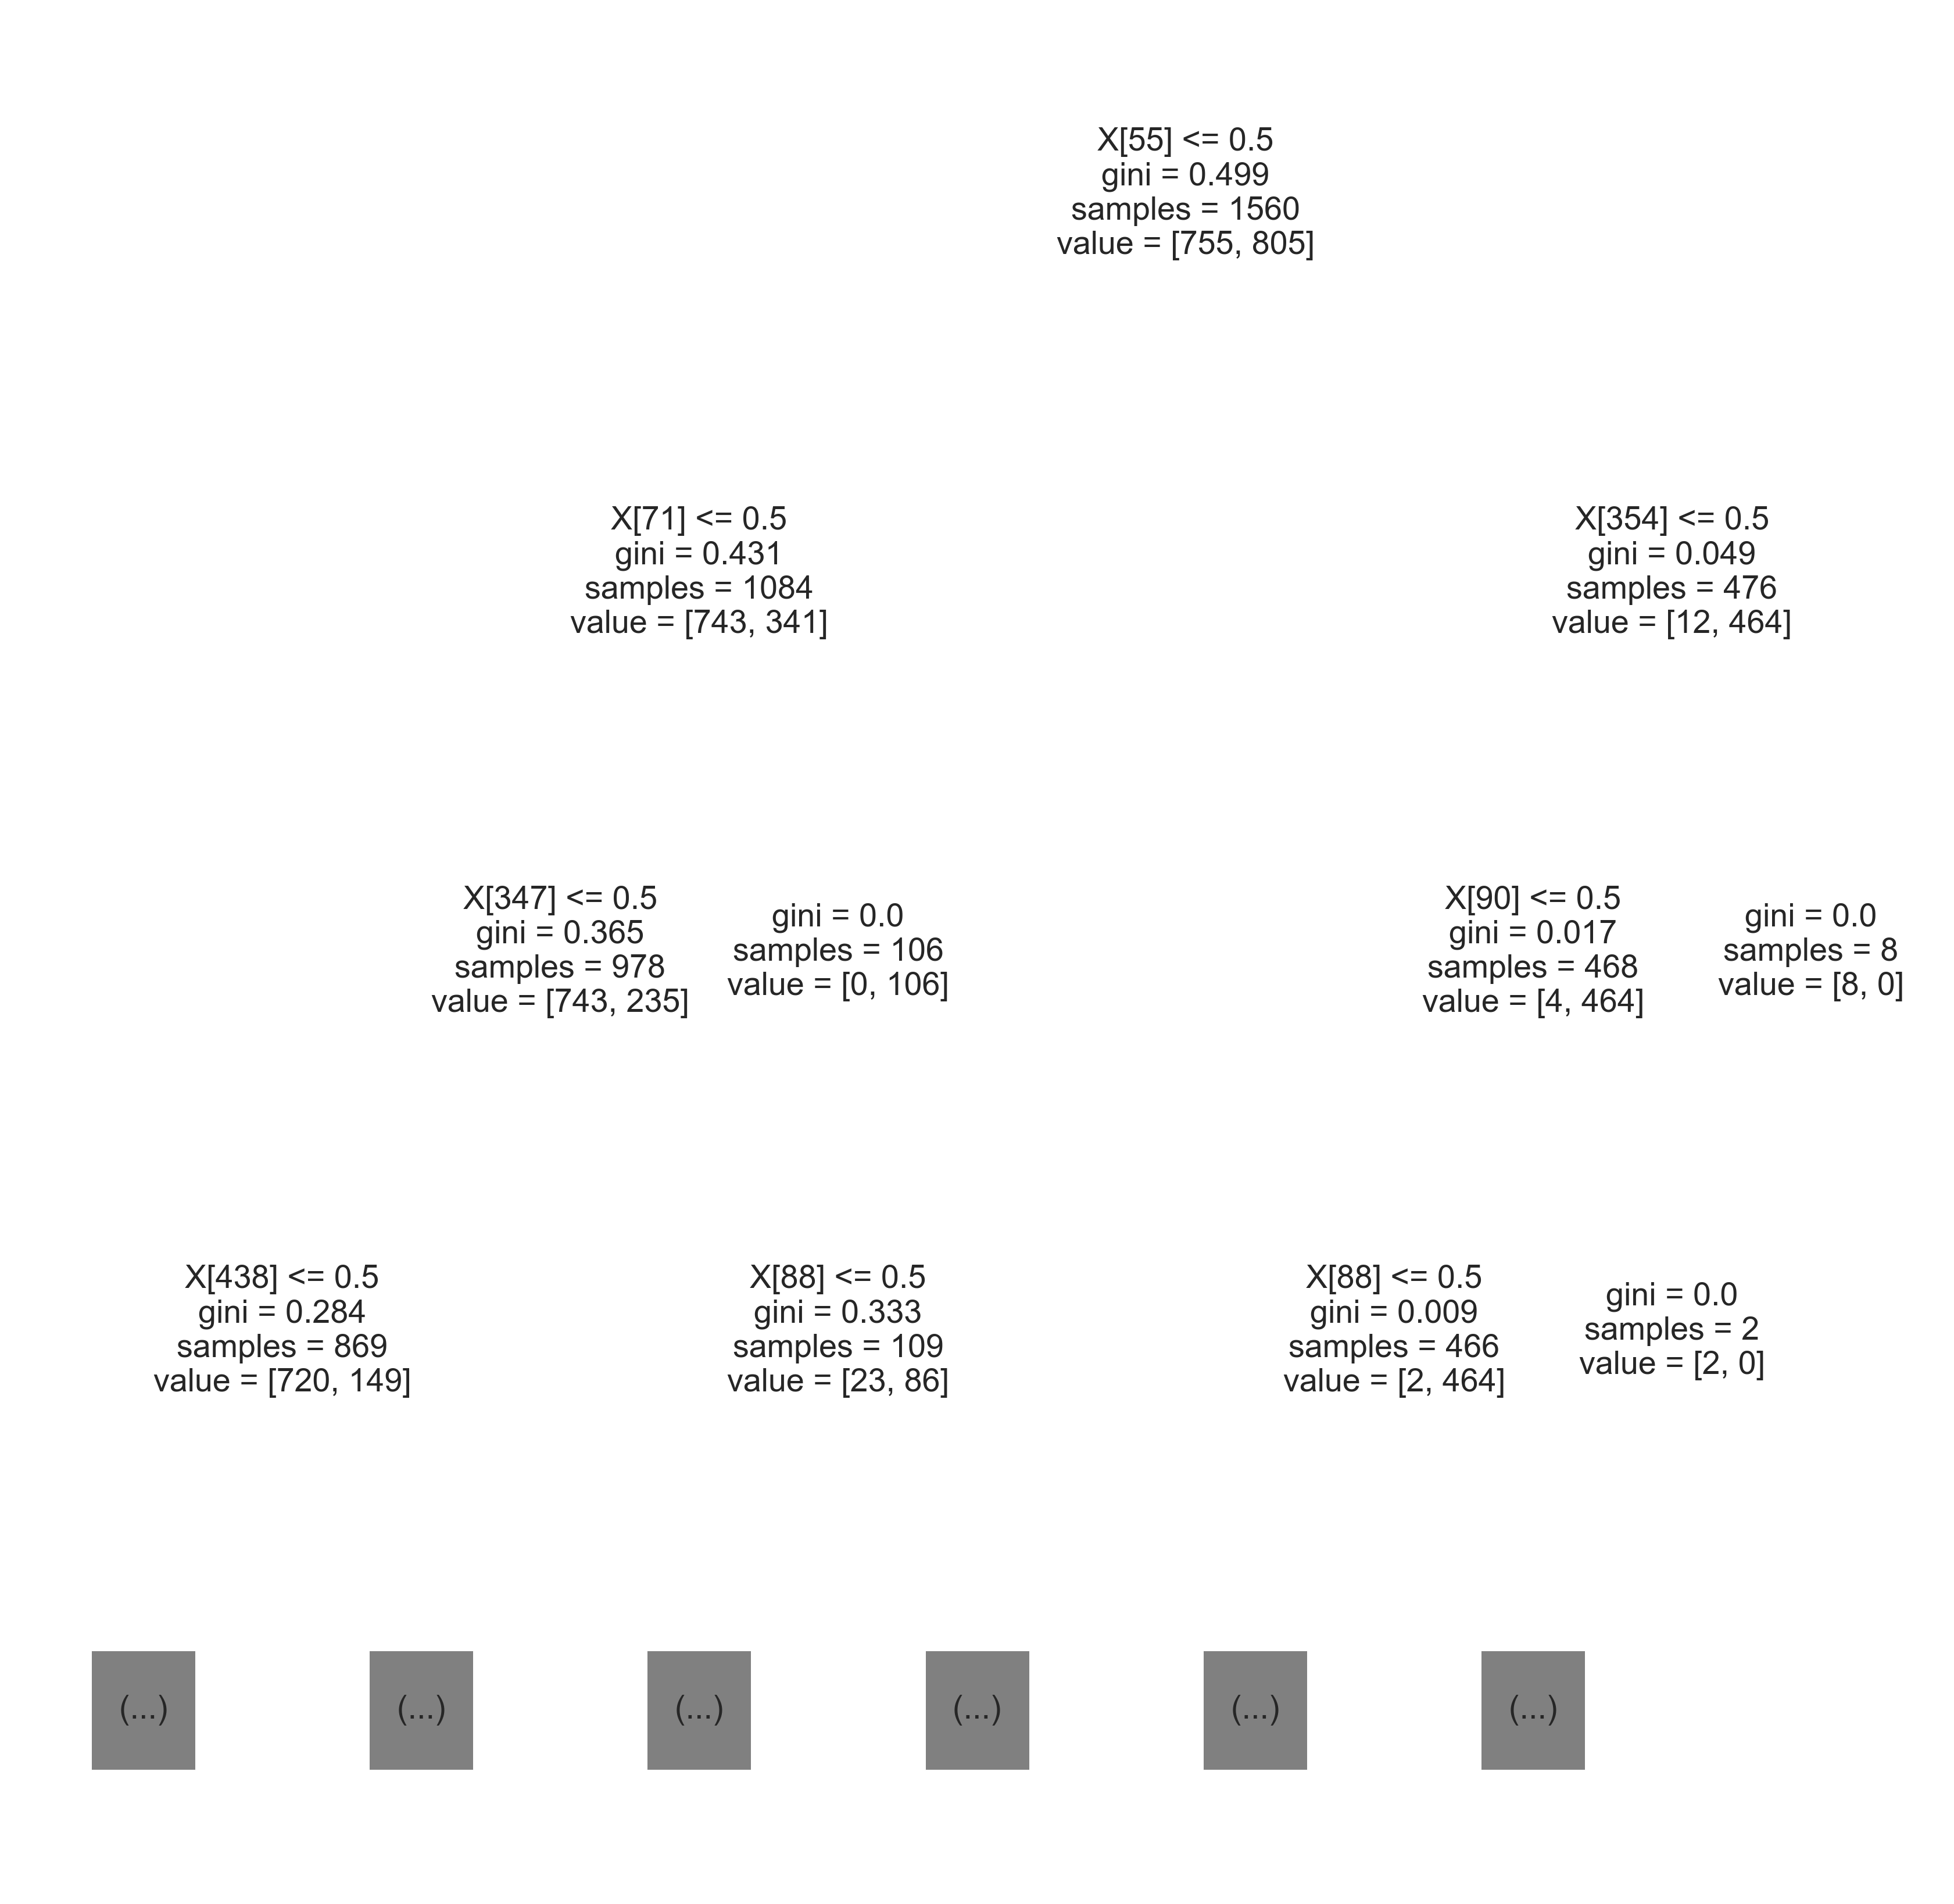

In [69]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=60,60

tree.plot_tree(dt,max_depth=3);

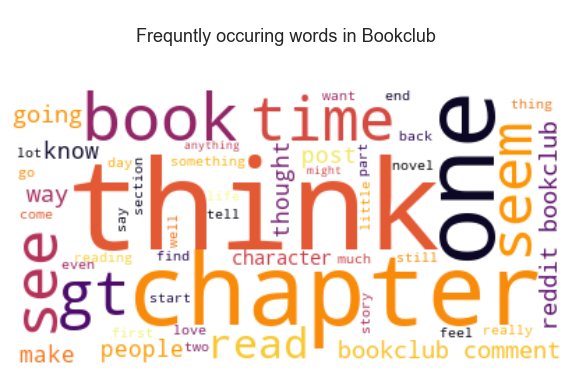

In [70]:
# word cloud for subreddit - bookclub
book=" ".join(post for post in reddit[reddit['subreddit']==1].lemmatized)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(book)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words in Bookclub\n\n',fontsize=18)
plt.axis("off")
plt.show()

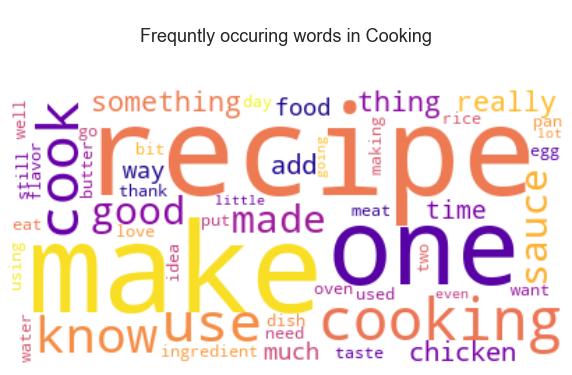

In [71]:
# word cloud for subreddit - cooking
cooking=" ".join(post for post in reddit[reddit['subreddit']==0].lemmatized)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="plasma").generate(cooking)
plt.figure(figsize=(10,10))
plt.title('\nFrequntly occuring words in Cooking\n\n',fontsize=18)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Conclusions and Recommendation
---

 By interpreting the nodes of Decision Tree structure, it is evident that approximately 330 posts in **Cooking** contains the word **"book"** and most of the post includes words related to books like chapter, read etc. 
On the other hand very minimal post in **Bookclub** have words related to cooking like recipe,meat,ingredient, oil etc. Based on this data it can be inferred that post in cooking forum might have referred to any recipe from a book and posts in Bookclub might be referring to any recipe in a cook book. 
But based on this data, this assumption cannot be confirmed . Since reddit is a popular forum, top 1000 posts from subreddit 'Cooking and 'Bookclub' were explored. This analysis can be extended to more posts in the same subreddit, other related subreddit and other popular online discussion forum to get a better insight about cookbook, which will help to conclude about profitability of publishing an cook book.



